In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [41]:
from matplotlib import rcParams

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 8,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 510 # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * ratio  # height in inches
fig_size = [fig_width, 1.5*fig_height]
rcParams.update({'figure.figsize': fig_size})

In [21]:
sns.set_context("paper")

In [10]:
qs = np.linspace(0,1,20)
ps = np.linspace(0,1,20)

/tmp/ipykernel_2974689/3870319531.py:166: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


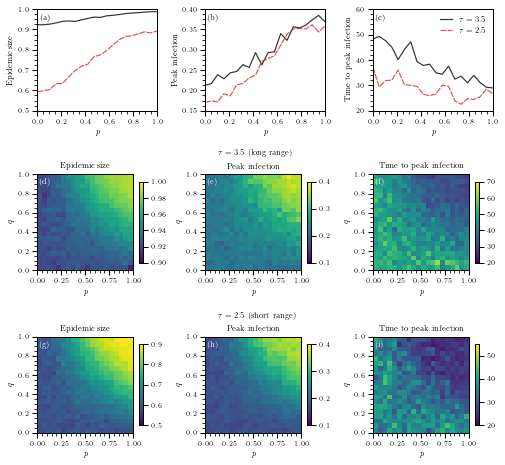

In [121]:
#fig, ax = plt.subplots(ncols=3)
mosaic = """
    ABC
    DEF
    GHI
    """

N = 1e4

fig = plt.figure(constrained_layout=True)

ax = fig.subplot_mosaic(mosaic)
fig.patch.set_facecolor('white')

s_arr_25 = []
i_arr_25 = []
t_arr_25 = []

s_arr_35 = []
i_arr_35 = []
t_arr_35 = []

for q in qs:
    for p in ps:
        
        s_arr_25_ = []
        i_arr_25_ = []
        t_arr_25_ = []

        s_arr_35_ = []
        i_arr_35_ = []
        t_arr_35_ = []
        
        for e in range(2):
            
            s = np.load("../data/random_edge_removal/3.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/random_edge_removal/3.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/random_edge_removal/3.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            
            s_arr_35_.append(float(s)/N)
            i_arr_35_.append(float(i)/N)
            t_arr_35_.append(float(t))
            
            s = np.load("../data/random_edge_removal/2.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/random_edge_removal/2.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/random_edge_removal/2.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")

            s_arr_25_.append(float(s)/N)
            i_arr_25_.append(float(i)/N)
            t_arr_25_.append(float(t))

        s_arr_35.append(np.mean(s_arr_35_))
        i_arr_35.append(np.mean(i_arr_35_))
        t_arr_35.append(np.mean(t_arr_35_))
        
        s_arr_25.append(np.mean(s_arr_25_))
        i_arr_25.append(np.mean(i_arr_25_))
        t_arr_25.append(np.mean(t_arr_25_))
        
s_arr_25 = np.array(s_arr_25).reshape(len(qs),len(ps))[::-1]
i_arr_25 = np.array(i_arr_25).reshape(len(qs),len(ps))[::-1]
t_arr_25 = np.array(t_arr_25).reshape(len(qs),len(ps))[::-1]

s_arr_35 = np.array(s_arr_35).reshape(len(qs),len(ps))[::-1]
i_arr_35 = np.array(i_arr_35).reshape(len(qs),len(ps))[::-1]
t_arr_35 = np.array(t_arr_35).reshape(len(qs),len(ps))[::-1]

text = ax["A"].text(0.02*1,0.9*0.5+0.5,r"(a)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["B"].text(0.02*1,0.9*0.25+0.15,r"(b)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["C"].text(0.02*1,0.9*40+20,r"(c)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

text = ax["D"].text(0.02*1,0.9*1,r"(d)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["E"].text(0.02*1,0.9*1,r"(e)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["F"].text(0.02*1,0.9*1,r"(f)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

text = ax["G"].text(0.02*1,0.9*1,r"(g)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["H"].text(0.02*1,0.9*1,r"(h)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["I"].text(0.02*1,0.9*1,r"(i)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

ax["A"].plot(ps,1-s_arr_35[2],'k',alpha=0.8)
ax["B"].plot(ps,i_arr_35[2],'k',alpha=0.8)
ax["C"].plot(ps,t_arr_35[2],'k',alpha=0.8,label=r"$\tau=3.5$")

ax["A"].plot(ps,1-s_arr_25[2],'tab:red',alpha=0.8,ls=(0, (5, 1)))
ax["B"].plot(ps,i_arr_25[2],'tab:red',alpha=0.8,ls=(0, (5, 1)))
ax["C"].plot(ps,t_arr_25[2],'tab:red',alpha=0.8,ls=(0, (5, 1)),label=r"$\tau=2.5$")

ax["D"].set_title(r"Epidemic size",horizontalalignment="center")
ax["E"].set_title(r"Peak infection",horizontalalignment="center")
ax["F"].set_title(r"Time to peak infection",horizontalalignment="center")

ax["G"].set_title(r"Epidemic size",horizontalalignment="center")
ax["H"].set_title(r"Peak infection")
ax["I"].set_title(r"Time to peak infection",horizontalalignment="center")

ax["A"].set_ylim(0.5,1.0)
ax["B"].set_ylim(0.15,0.4)
ax["C"].set_ylim(20,60)
ax["A"].set_xlim(0,1)
ax["B"].set_xlim(0,1)
ax["C"].set_xlim(0,1)

ax["A"].set_ylabel(r"Epidemic size")
ax["B"].set_ylabel(r"Peak infection")
ax["C"].set_ylabel(r"Time to peak infection")
ax["A"].set_xlabel(r"$p$")
ax["B"].set_xlabel(r"$p$")
ax["C"].set_xlabel(r"$p$")

ax["D"].set_xlabel(r"$p$")
ax["E"].set_xlabel(r"$p$")
ax["F"].set_xlabel(r"$p$")
ax["G"].set_xlabel(r"$p$")
ax["H"].set_xlabel(r"$p$")
ax["I"].set_xlabel(r"$p$")

ax["D"].set_ylabel(r"$q$")
ax["E"].set_ylabel(r"$q$")
ax["F"].set_ylabel(r"$q$")
ax["G"].set_ylabel(r"$q$")
ax["H"].set_ylabel(r"$q$")
ax["I"].set_ylabel(r"$q$")

ax["A"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["B"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["C"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["A"].yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax["B"].yaxis.set_minor_locator(ticker.MultipleLocator(0.0125))
ax["C"].yaxis.set_minor_locator(ticker.MultipleLocator(2.0))

ax["D"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["D"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["E"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["E"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["F"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["F"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax["G"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["G"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["H"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["H"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["I"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["I"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax["E"].text(0.13,1.2,r"$\tau=3.5$ (long range)")
p1 = ax["D"].imshow(1-s_arr_35, vmin=0.9, vmax=1, extent = [0 , 1, 0 , 1])
p2 = ax["E"].imshow(i_arr_35, vmin=0.1, vmax=0.4, extent = [0 , 1, 0 , 1])
p3 = ax["F"].imshow(t_arr_35, vmin=20, vmax=70, extent = [0 , 1, 0 , 1])

ax["H"].text(0.13,1.2,r"$\tau=2.5$ (short range)")
p4 = ax["G"].imshow(1-s_arr_25, vmin=0.5, vmax=0.9, extent = [0 , 1, 0 , 1])
p5 = ax["H"].imshow(i_arr_25, vmin=0.1, vmax=0.4, extent = [0 , 1, 0 , 1])
p6 = ax["I"].imshow(t_arr_25, vmin=20, vmax=55, extent = [0 , 1, 0 , 1])

ax["C"].legend(loc=1,frameon=False,handlelength=1.5)

plt.tight_layout()

cbar = fig.colorbar(p1, ax=ax["D"], shrink=0.8)
cbar = fig.colorbar(p2, ax=ax["E"], shrink=0.8)
cbar = fig.colorbar(p3, ax=ax["F"], shrink=0.8)

cbar = fig.colorbar(p4, ax=ax["G"], shrink=0.8)
cbar = fig.colorbar(p5, ax=ax["H"], shrink=0.8)
cbar = fig.colorbar(p6, ax=ax["I"], shrink=0.8)

plt.savefig("edge_removal_random.png",dpi=480)
plt.show()

/tmp/ipykernel_2974689/4044908057.py:166: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


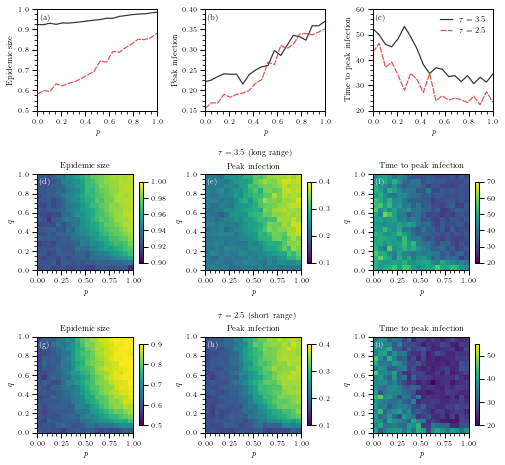

In [123]:
#fig, ax = plt.subplots(ncols=3)
mosaic = """
    ABC
    DEF
    GHI
    """

N = 1e4

fig = plt.figure(constrained_layout=True)

ax = fig.subplot_mosaic(mosaic)
fig.patch.set_facecolor('white')

s_arr_25 = []
i_arr_25 = []
t_arr_25 = []

s_arr_35 = []
i_arr_35 = []
t_arr_35 = []

for q in qs:
    for p in ps:
        
        s_arr_25_ = []
        i_arr_25_ = []
        t_arr_25_ = []

        s_arr_35_ = []
        i_arr_35_ = []
        t_arr_35_ = []
        
        for e in range(2):
            
            s = np.load("../data/targeted_edge_removal/3.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/targeted_edge_removal/3.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/targeted_edge_removal/3.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            
            s_arr_35_.append(float(s)/N)
            i_arr_35_.append(float(i)/N)
            t_arr_35_.append(float(t))
            
            s = np.load("../data/targeted_edge_removal/2.5/S_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            i = np.load("../data/targeted_edge_removal/2.5/I_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")
            t = np.load("../data/targeted_edge_removal/2.5/t_"+str(q)+"_"+str(p)+"_"+str(e)+".npy")

            s_arr_25_.append(float(s)/N)
            i_arr_25_.append(float(i)/N)
            t_arr_25_.append(float(t))

        s_arr_35.append(np.mean(s_arr_35_))
        i_arr_35.append(np.mean(i_arr_35_))
        t_arr_35.append(np.mean(t_arr_35_))
        
        s_arr_25.append(np.mean(s_arr_25_))
        i_arr_25.append(np.mean(i_arr_25_))
        t_arr_25.append(np.mean(t_arr_25_))

s_arr_25 = np.array(s_arr_25).reshape(len(qs),len(ps))[::-1]
i_arr_25 = np.array(i_arr_25).reshape(len(qs),len(ps))[::-1]
t_arr_25 = np.array(t_arr_25).reshape(len(qs),len(ps))[::-1]

s_arr_35 = np.array(s_arr_35).reshape(len(qs),len(ps))[::-1]
i_arr_35 = np.array(i_arr_35).reshape(len(qs),len(ps))[::-1]
t_arr_35 = np.array(t_arr_35).reshape(len(qs),len(ps))[::-1]

text = ax["A"].text(0.02*1,0.9*0.5+0.5,r"(a)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["B"].text(0.02*1,0.9*0.25+0.15,r"(b)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["C"].text(0.02*1,0.9*40+20,r"(c)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

text = ax["D"].text(0.02*1,0.9*1,r"(d)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["E"].text(0.02*1,0.9*1,r"(e)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["F"].text(0.02*1,0.9*1,r"(f)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

text = ax["G"].text(0.02*1,0.9*1,r"(g)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["H"].text(0.02*1,0.9*1,r"(h)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))
text = ax["I"].text(0.02*1,0.9*1,r"(i)",color="white")
#text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

ax["A"].plot(ps,1-s_arr_35[12],'k',alpha=0.8)
ax["B"].plot(ps,i_arr_35[12],'k',alpha=0.8)
ax["C"].plot(ps,t_arr_35[12],'k',alpha=0.8,label=r"$\tau=3.5$")

ax["A"].plot(ps,1-s_arr_25[12],'tab:red',alpha=0.8,ls=(0, (5, 1)))
ax["B"].plot(ps,i_arr_25[12],'tab:red',alpha=0.8,ls=(0, (5, 1)))
ax["C"].plot(ps,t_arr_25[12],'tab:red',alpha=0.8,ls=(0, (5, 1)),label=r"$\tau=2.5$")

ax["D"].set_title(r"Epidemic size",horizontalalignment="center")
ax["E"].set_title(r"Peak infection",horizontalalignment="center")
ax["F"].set_title(r"Time to peak infection",horizontalalignment="center")

ax["G"].set_title(r"Epidemic size",horizontalalignment="center")
ax["H"].set_title(r"Peak infection")
ax["I"].set_title(r"Time to peak infection",horizontalalignment="center")

ax["A"].set_ylim(0.5,1.0)
ax["B"].set_ylim(0.15,0.4)
ax["C"].set_ylim(20,60)
ax["A"].set_xlim(0,1)
ax["B"].set_xlim(0,1)
ax["C"].set_xlim(0,1)

ax["A"].set_ylabel(r"Epidemic size")
ax["B"].set_ylabel(r"Peak infection")
ax["C"].set_ylabel(r"Time to peak infection")
ax["A"].set_xlabel(r"$p$")
ax["B"].set_xlabel(r"$p$")
ax["C"].set_xlabel(r"$p$")

ax["D"].set_xlabel(r"$p$")
ax["E"].set_xlabel(r"$p$")
ax["F"].set_xlabel(r"$p$")
ax["G"].set_xlabel(r"$p$")
ax["H"].set_xlabel(r"$p$")
ax["I"].set_xlabel(r"$p$")

ax["D"].set_ylabel(r"$q$")
ax["E"].set_ylabel(r"$q$")
ax["F"].set_ylabel(r"$q$")
ax["G"].set_ylabel(r"$q$")
ax["H"].set_ylabel(r"$q$")
ax["I"].set_ylabel(r"$q$")

ax["A"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["B"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["C"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["A"].yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax["B"].yaxis.set_minor_locator(ticker.MultipleLocator(0.0125))
ax["C"].yaxis.set_minor_locator(ticker.MultipleLocator(2.0))

ax["D"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["D"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["E"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["E"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["F"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["F"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax["G"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["G"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["H"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["H"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["I"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["I"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax["E"].text(0.13,1.2,r"$\tau=3.5$ (long range)")
p1 = ax["D"].imshow(1-s_arr_35, vmin=0.9, vmax=1, extent = [0 , 1, 0 , 1])
p2 = ax["E"].imshow(i_arr_35, vmin=0.1, vmax=0.4, extent = [0 , 1, 0 , 1])
p3 = ax["F"].imshow(t_arr_35, vmin=20, vmax=70, extent = [0 , 1, 0 , 1])

ax["H"].text(0.13,1.2,r"$\tau=2.5$ (short range)")
p4 = ax["G"].imshow(1-s_arr_25, vmin=0.5, vmax=0.9, extent = [0 , 1, 0 , 1])
p5 = ax["H"].imshow(i_arr_25, vmin=0.1, vmax=0.4, extent = [0 , 1, 0 , 1])
p6 = ax["I"].imshow(t_arr_25, vmin=20, vmax=55, extent = [0 , 1, 0 , 1])

ax["C"].legend(loc=1,frameon=False,handlelength=1.5)

plt.tight_layout()

cbar = fig.colorbar(p1, ax=ax["D"], shrink=0.8)
cbar = fig.colorbar(p2, ax=ax["E"], shrink=0.8)
cbar = fig.colorbar(p3, ax=ax["F"], shrink=0.8)

cbar = fig.colorbar(p4, ax=ax["G"], shrink=0.8)
cbar = fig.colorbar(p5, ax=ax["H"], shrink=0.8)
cbar = fig.colorbar(p6, ax=ax["I"], shrink=0.8)

plt.savefig("edge_removal_targeted.png",dpi=480)
plt.show()

In [120]:
qs[-2]

0.9473684210526315